In [36]:
from my_code.boat import boat
import numpy as np
from numpy import pi, cos, sin, arctan2
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.animation import FuncAnimation
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
def Rx(theta):
    return np.asarray([[cos(theta),sin(theta)],[-sin(theta),cos(theta)]])

<IPython.core.display.Javascript object>


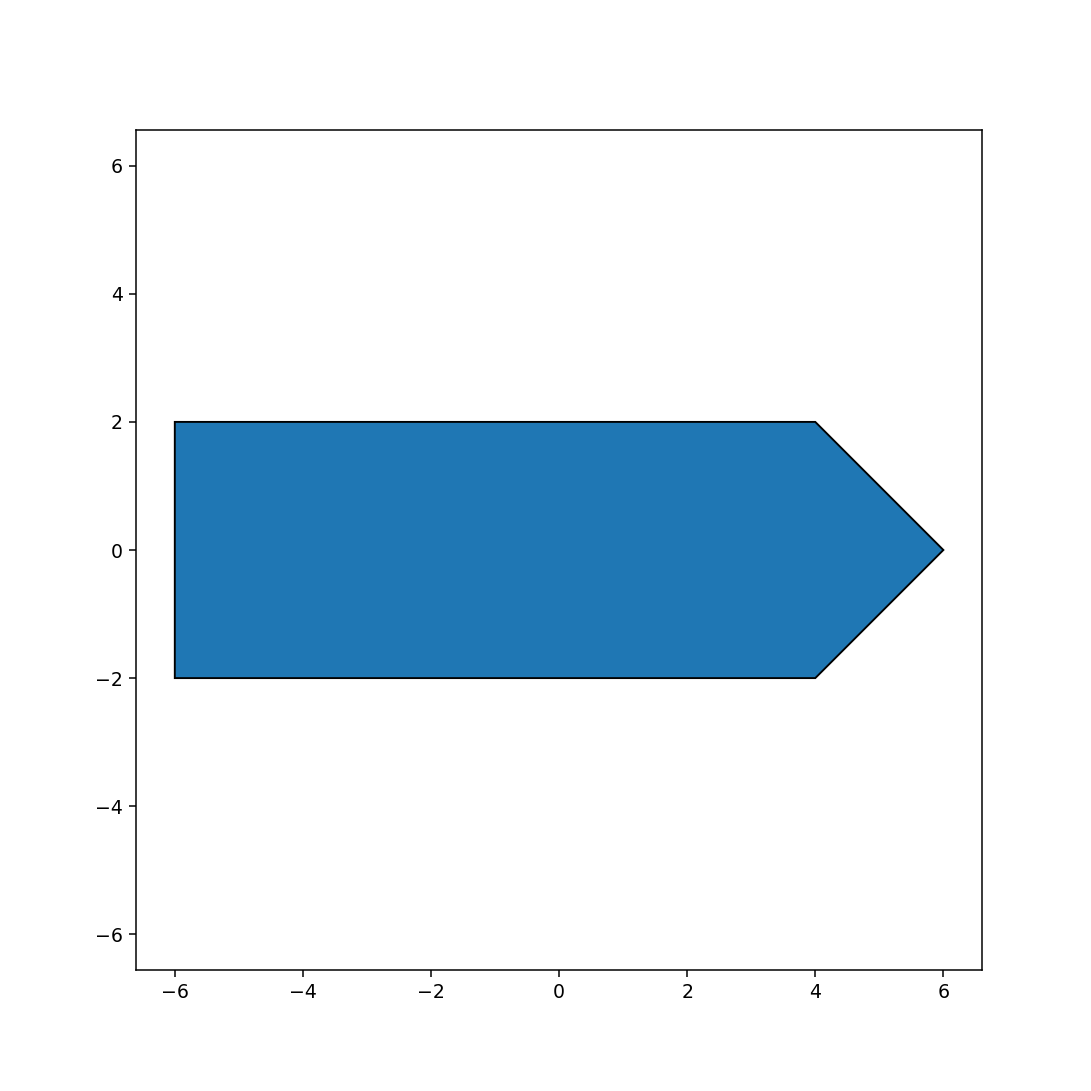

In [38]:
# Load and plot boat
B = boat()

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(B[0,:],B[1,:],'C0', ec='k',zorder=1)
plt.show()

<IPython.core.display.Javascript object>


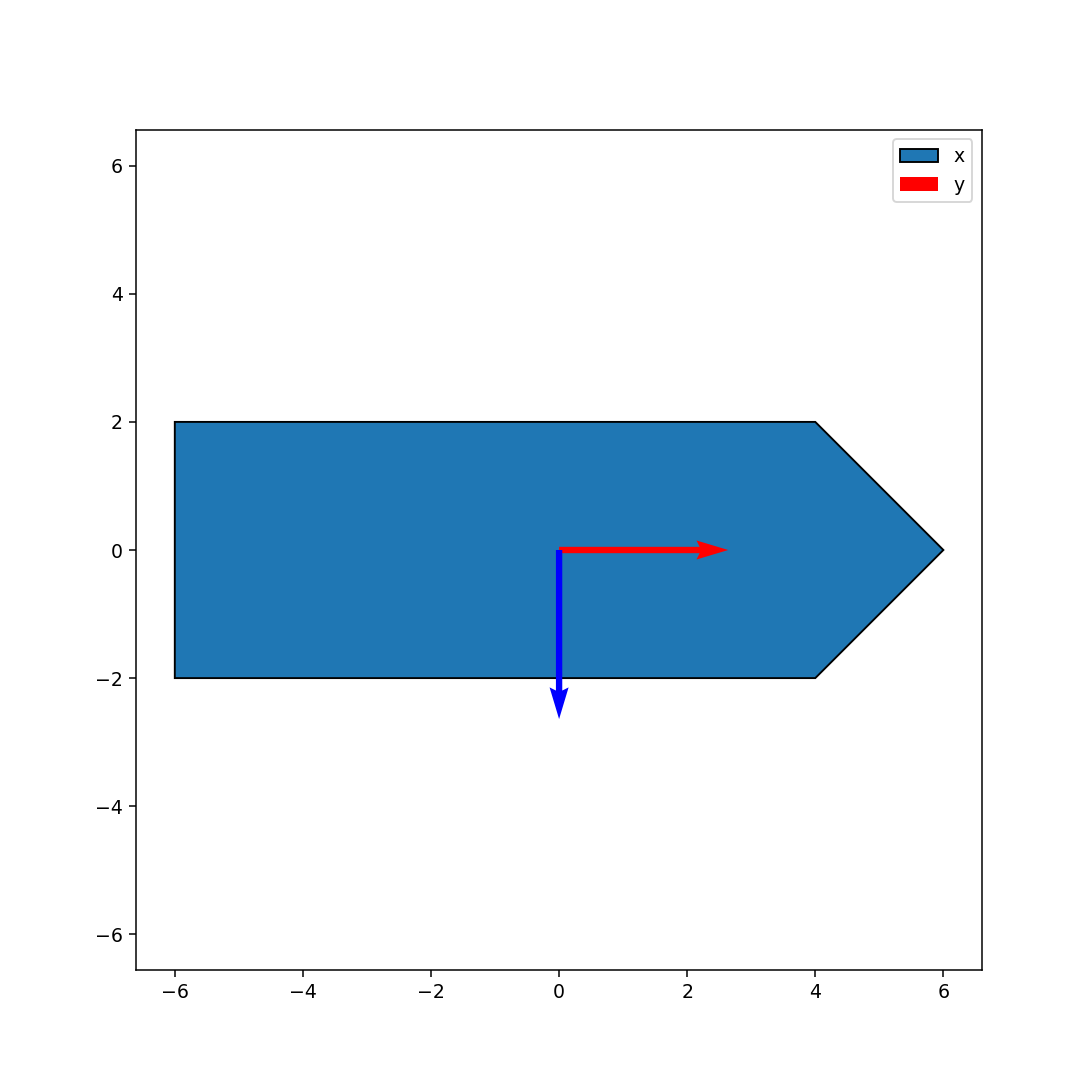

In [39]:
# Load and plot boat
B = boat()
# Create axes vectors 
A = np.asarray([[1,0],[0,1]])
T = np.asarray([[1,0],[0,-1]])
A = T@A
origin = np.array([[0, 0],[0, 0]]) # origin point

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(B[0,:],B[1,:],'C0', ec='k',zorder=0)
plt.quiver(*origin, A[:,0], A[:,1], color=['r','b'], scale=5,zorder=1)
plt.legend(['x','y'])
plt.show()

<IPython.core.display.Javascript object>


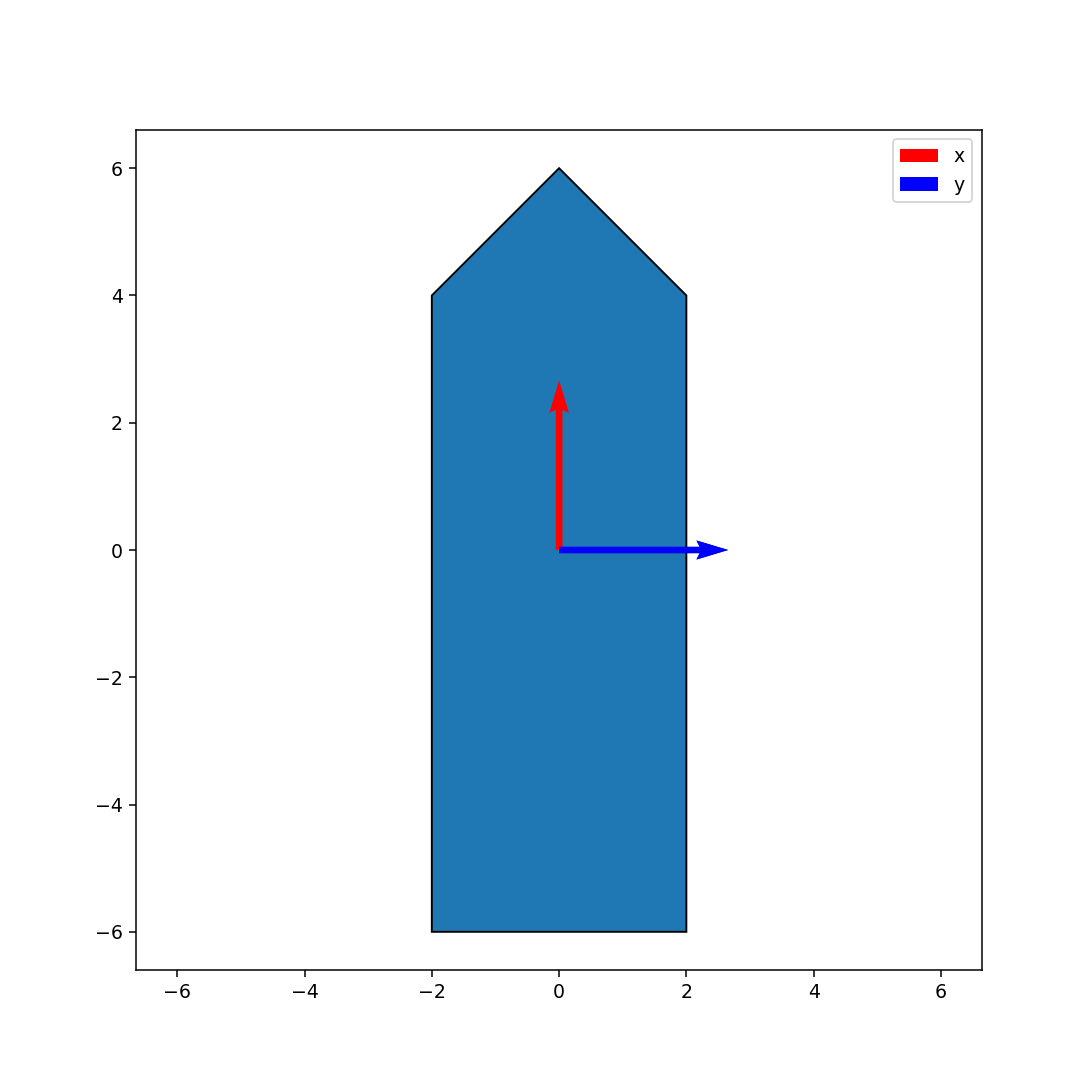

In [40]:
# Load and plot boat
B = boat()
# Create axe vectors 
axes = ['x','y']
color_axes = ['r','b']
x = np.asarray([[1],[0]])
y = np.asarray([[0],[1]])
# Combine them in a reference system matrix
A = np.asarray([x,y])

T = np.asarray([[1,0],[0,-1]])
A = T@A
origin = np.array([[0, 0],[0, 0]]) # origin point

# Take boat and align to the North axis
R = Rx(-pi/2)
B = R@boat()
A = R@A

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(B[0,:],B[1,:],'C0', ec='k',zorder=0)
for i,a in enumerate(axes):
    plt.quiver(*origin, A[i,0], A[i,1], color=color_axes[i],label=axes[i], scale=5,zorder=1)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


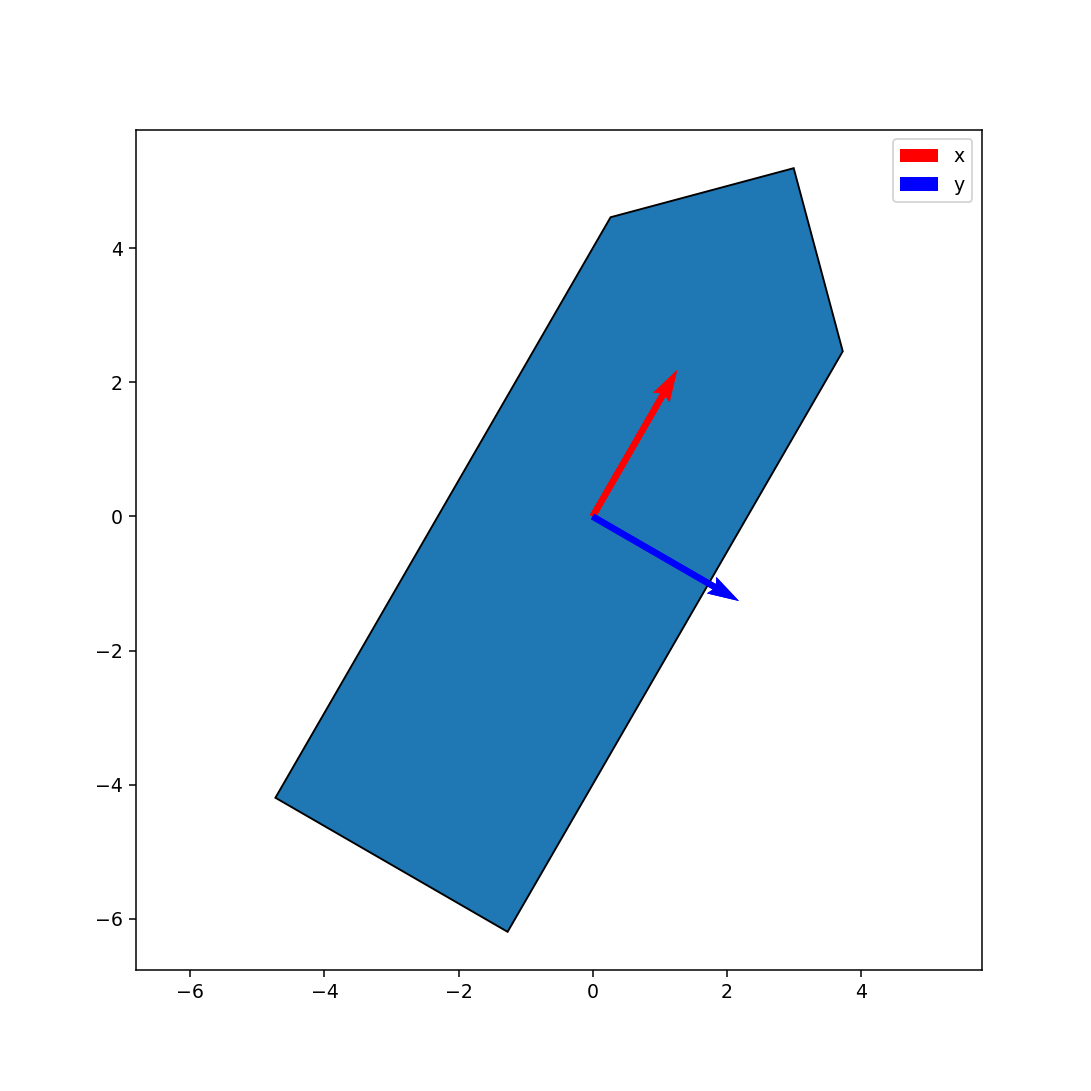

In [41]:
h = pi/6
# Load and plot boat
B = boat()

# Create axe vectors
axes = ['x','y']
color_axes = ['r','b']
x = np.asarray([[1],[0]])
y = np.asarray([[0],[1]])
# Combine them in a reference system matrix
A = np.asarray([x,y])

# Create reflection matrix for y-axis
T = np.asarray([[1,0],[0,-1]])

# Reflect the y-axis to align right-handed rotation to be clockwise
# (Y-axis is positive to starboard)
A = T@A
x = T@A
origin = np.array([[0, 0],[0, 0]]) # origin point

# Take boat and align to the North axis
R = Rx(-pi/2)
B = R@boat()
A = R@A

# Now Apply the heading
R = Rx(h)
B = R@B
A = R@A

# Plot the properly rotated boat and axes
plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(B[0,:],B[1,:],'C0', ec='k',zorder=1)
for i,a in enumerate(axes):
    plt.quiver(*origin, A[i,0], A[i,1], color=color_axes[i],label=axes[i], scale=5,zorder=1)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


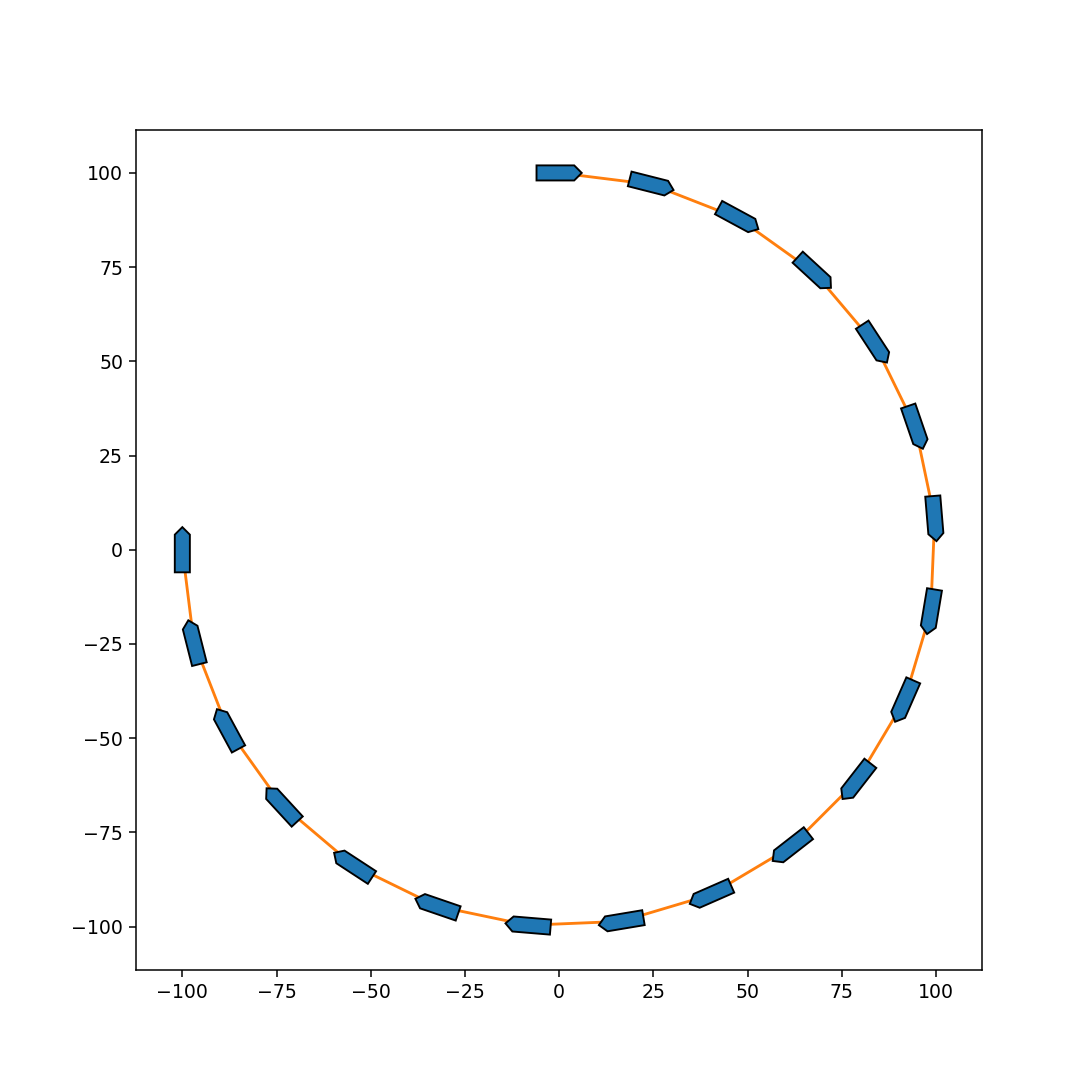

In [42]:
# 2D plot of circular track
num_pos = 20
r = 100
t = np.linspace(0, 3/2*np.pi, num_pos)
h = t + pi/2

pos=np.asarray([r*sin(t), r*cos(t)])
# Load boat vertices and align to the North axes
B = Rx(-pi/2)@boat()

plt.figure(figsize=(8, 8))
plt.axis('equal')

# The code below is relatively efficient, but can be optimized 
# significanly further (at the cost of readability)

p_prev = pos[0:2,0:1]
for i in range(pos.shape[1]):
    p = pos[0:2,i:i+1]
    plt.plot([p_prev[0,0], p[0,0]],[p_prev[1,0], p[1,0]],'C1',zorder=0)
    R = np.asarray([[cos(h[i]), sin(h[i])],[-sin(h[i]),cos(h[i])]])
    C = R@B+p
    plt.fill(C[0,:],C[1,:],'C0', ec='k',zorder=1)
    p_prev = p
    
    

<IPython.core.display.Javascript object>


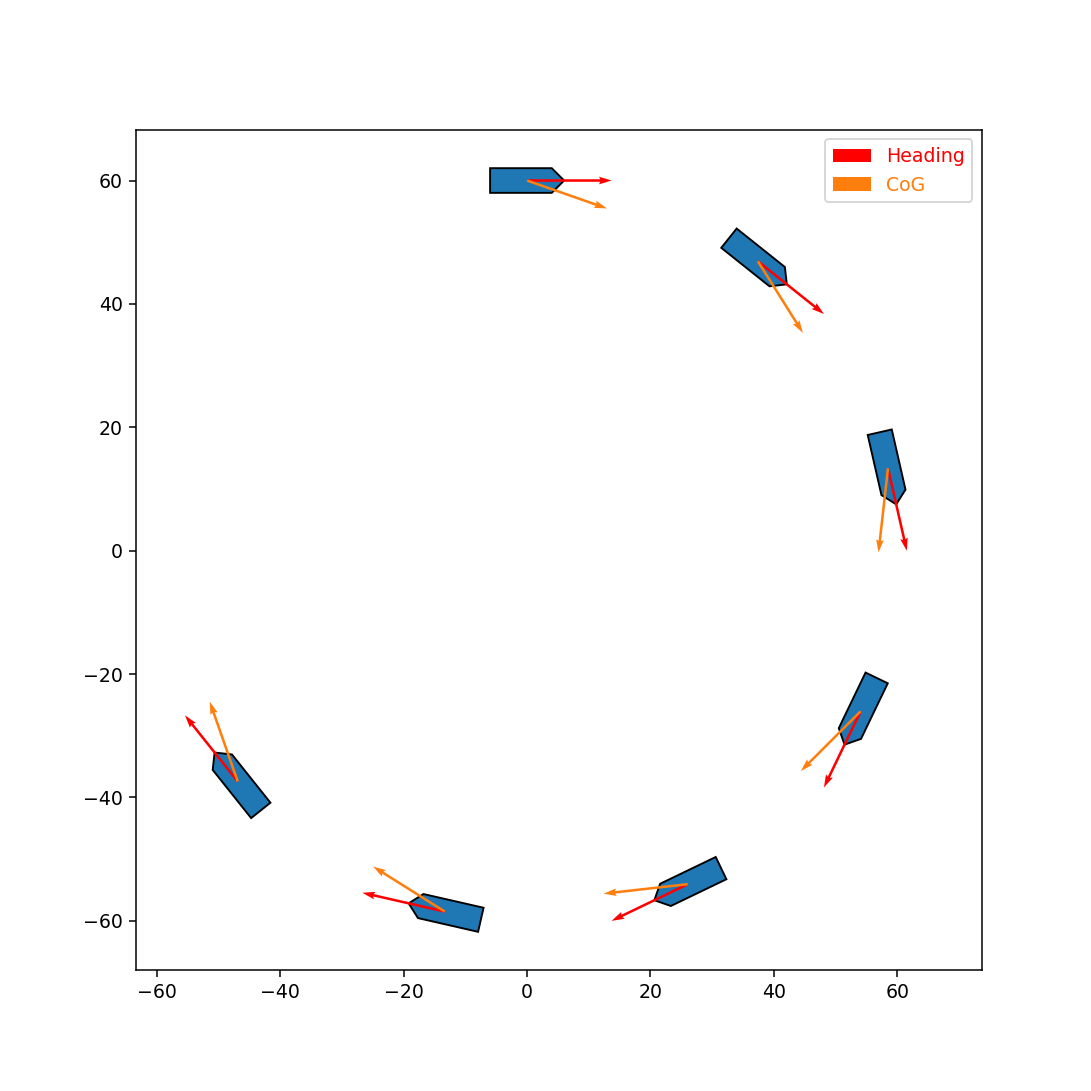

In [43]:
# 2D plot of circular track with heading vectors
num_pos = 8
r = 60
origin = np.array([[0], [0]])
# Create axe vectors
x = np.asarray([[1],[0]])
t = np.linspace(0, 3/2*np.pi, num_pos)
h = t + pi/2

# Create the track
pos=np.asarray([r*sin(t), r*cos(t)])

# Determine the course over ground vectors from the positioning differences
# Normalize the length 
cog_vec = np.asarray([(((v@v.T)**-.5)*v) for i,v in enumerate(np.diff(pos).T)]).T

# Load boat vertices and align to the North axes
B = Rx(-pi/2)@boat()

plt.figure(figsize=(8, 8))
plt.axis('equal')

# The code below is relatively efficient, but can be optimized 
# significanly further (at the cost of readability)

p_prev = pos[0:2,0:1]
for i in range(pos.shape[1]-1):
    h_vec = Rx(t[i])@x
    p = pos[0:2,i:i+1]
    R = np.asarray([[cos(h[i]), sin(h[i])],[-sin(h[i]),cos(h[i])]])
    C = R@B+p
    plt.fill(C[0,:],C[1,:],'C0', ec='k',zorder=1)
    v1 = plt.quiver(pos[0,i],pos[1,i], h_vec[0,:], h_vec[1,:], color=['r'], label = 'Heading', width = .003, scale=10)
    v2 = plt.quiver(pos[0,i],pos[1,i], cog_vec[0,i], cog_vec[1,i], color=['C1'], width = .003, scale=10)
    p_prev = p
    
plt.legend([v1,v2],['Heading','CoG'],labelcolor=['r','C1'])
plt.show()


<IPython.core.display.Javascript object>


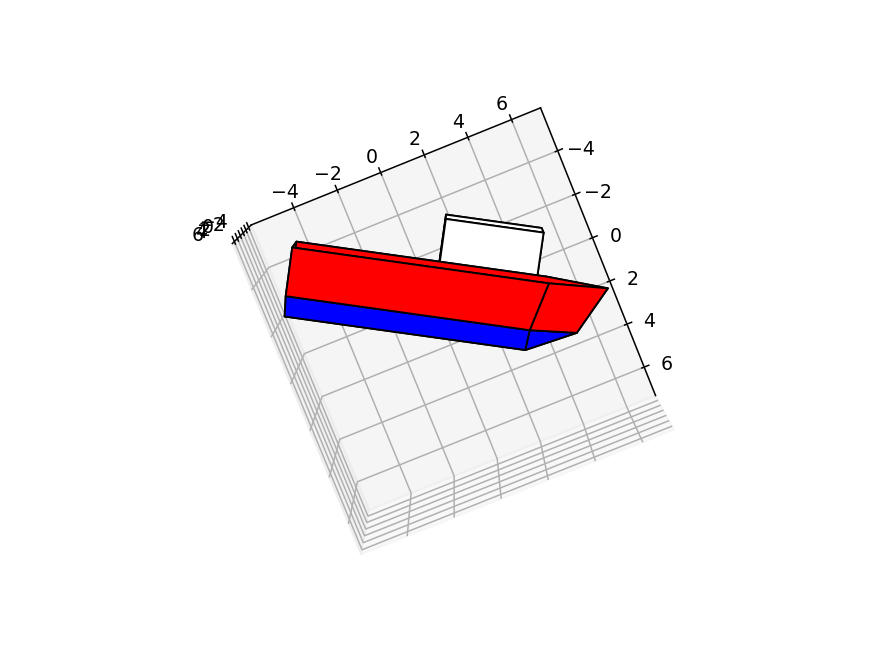

In [81]:
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, art3d

th = -1*pi/6
r = 1*pi/2
Rx = np.array([[cos(r), 0, -sin(r)],[0,1,0],[sin(r), 0,cos(r)]])
Rz = np.array([[cos(th), -sin(th), 0],[sin(th), cos(th),0],[0,0,1]])

V = np.array([[0,-6,-1], [0,4,-1], 
              [-2,-6,0], [-2,4,0], [0,6,0], [2,4,0], [2,-6,0], 
              [-2,-6,2], [-2,4.5,2], [0,7,2], [2,4.5,2], [2,-6,2],
              [-1.6,0,2],[-1.6,4,2],[1.8,4,2],[1.8,0,2],
              [-1.6,0,4],[-1.6,4,4],[1.8,4,4],[1.8,0,4]])

V = (Rz@Rx@V.T).T

min_boat = min(V.flatten())
max_boat = max(V.flatten())

# f = np.array([[0,1,6],[0,1,2,3,4],[5,6,7,8,9]])
uw = np.array([[0,2,6,0],[ 0,1,3,2],[0,1,5,6],[1,3,4,1],[1,5,4,1]])
hull = np.array([[ 2, 7, 8, 3,2], [3, 8, 9, 4,3], [4, 9, 10, 5,4],[5,10,11,6,5],[6,11,7,2,6],[7,8,9,10,11]])
cabin = np.array([[12,13,14,15],[12,16,17,13],[13,17,18,14],[14,18,19,15],[15,19,16,12],[16,17,18,19]])


C = np.array([1,2,3,4,5,6,7,8,2,3,4,5])


fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.set_xlim(min_boat, max_boat)
ax.set_ylim(min_boat, max_boat)
ax.set_zlim(min_boat, max_boat)

norm = plt.Normalize(C.min(), C.max())
colors = plt.cm.viridis(norm(C))

pc1 = art3d.Poly3DCollection(V[uw], facecolors='b', edgecolor="black")
ax.add_collection(pc1)
pc2 = art3d.Poly3DCollection(V[hull], facecolors='r', edgecolor="black")
ax.add_collection(pc2)
pc3 = art3d.Poly3DCollection(V[cabin], facecolors='w', edgecolor="black")
ax.add_collection(pc3)

plt.show()

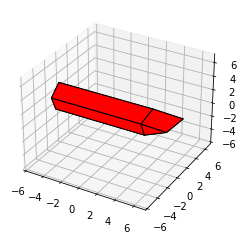

In [29]:
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, art3d

th = -1*pi/2
r = 1*pi/4
Rx = np.array([[cos(r), 0, -sin(r)],[0,1,0],[sin(r), 0,cos(r)]])
Rz = np.array([[cos(th), -sin(th), 0],[sin(th), cos(th),0],[0,0,1]])

V = np.array([[0,-6,-1], [0,4,-1], 
              [-2,-6,0], [-2,4,0], [0,6,0], [2,4,0], [2,-6,0], 
              [-2,-6,2], [-2,4.5,2], [0,7,2], [2,4.5,2], [2,-6,2],
              [0,1.8,2],[4,1.8,2],[4,-1.8,2],[0,-1.8,2],
              [0,1.8,4],[4,1.8,4],[4,-1.8,4],[0,-1.8,4]])

V = (Rz@Rx@V.T).T

min_boat = min(V.flatten())
max_boat = max(V.flatten())


f = np.array([[ 0, 2, 3, 1],
              [ 1, 3, 4, 1],
              [ 1, 4, 5, 1],
              [ 1, 5, 6, 0],
              [ 0, 2, 6, 0],
              [ 2, 3, 5, 6],
              [ 3, 4, 5, 3],
              [ 2, 3, 8, 7],
              [ 3, 4, 9, 8],
              [ 4, 5,10, 9],
              [ 5, 6,11,10],
              [ 6, 2, 7,11],
              [ 7, 8,10,11],
              [ 8, 9,10, 8]
             ])



C = np.array([1,2,3,4,5,6,7,8,2,3,4,5])


fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.set_xlim(min_boat, max_boat)
ax.set_ylim(min_boat, max_boat)
ax.set_zlim(min_boat, max_boat)

norm = plt.Normalize(C.min(), C.max())
colors = plt.cm.viridis(norm(C))

pc = art3d.Poly3DCollection(V[f], facecolors='r', edgecolor="black")
ax.add_collection(pc)

plt.show()



In [19]:
uw

array([[0, 2, 6, 0, 1, 4, 3, 2, 6, 5, 4, 1]])